## EPFL Nadir

In [13]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [14]:
# pose_dir = '/Users/felicity/Desktop/Super-resolution-drones-depth-images/ICCV2019/EPFL_sim_nadir/poses/'
# pose_dir = '/Users/felicity/Desktop/Super-resolution-drones-depth-images/ICCV2019/EPFL_10_newsample_nadir/poses/'
# pose_dir = '/Users/felicity/Desktop/Super-resolution-drones-depth-images/ICCV2019/comballaz_nadir/poses/'
pose_dir = '/Users/felicity/Desktop/Super-resolution-drones-depth-images/ICCV2019/comballaz_oblique/poses/'


# pose_dir = '/Users/felicity/Desktop/TOPO/EPFL_10_sample_nadir/poses/'
_files = os.listdir(pose_dir)
_files.sort()
_pose_files = [pose_dir + f for f in _files]
_pose_files.sort()

# init_dir = '/Users/felicity/Desktop/Super-resolution-drones-depth-images/ICCV2019/EPFL_sim_nadir/init/'
# init_dir = '/Users/felicity/Desktop/Super-resolution-drones-depth-images/ICCV2019/EPFL_10_newsample_nadir/init/'
# init_dir = '/Users/felicity/Desktop/Super-resolution-drones-depth-images/ICCV2019/comballaz_nadir/init/'
init_dir = '/Users/felicity/Desktop/Super-resolution-drones-depth-images/ICCV2019/comballaz_oblique/init/'

# init_dir = '/Users/felicity/Desktop/TOPO/EPFL_10_sample_nadir/init/'
_datfiles = os.listdir(init_dir)
_datfiles.sort()
_init_files = [init_dir + f for f in _datfiles]
_init_files.sort()

In [15]:
len(_init_files)

25

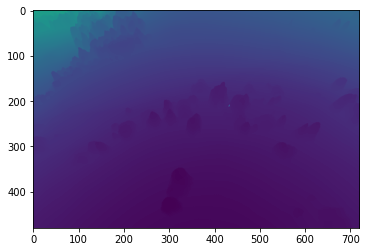

In [16]:
# dist_dir = '/Users/felicity/Desktop/Super-resolution-drones-depth-images/ICCV2019/EPFL_sim_nadir/dist/'

# dist_dir = '/Users/felicity/Desktop/Super-resolution-drones-depth-images/ICCV2019/EPFL_10_newsample_nadir/dist/'
# dist_dir = '/Users/felicity/Desktop/Super-resolution-drones-depth-images/ICCV2019/comballaz_nadir/dist/'
dist_dir = '/Users/felicity/Desktop/Super-resolution-drones-depth-images/ICCV2019/comballaz_oblique/dist/'

# dist_dir = '/Users/felicity/Desktop/TOPO/EPFL_10_sample_nadir/dist/'
for num in range(len(_init_files)):
    if num != -1: #sometimes need this, some times not, but here already set not needed ?!!!!
        pose = np.loadtxt(pose_dir + _files[num])
        cam_in_world = np.dot(pose,[0,0,0,1])
        cam_in_world = cam_in_world[:-1]

        init = torch.load(init_dir + _datfiles[num])
        dist = torch.zeros(init.size(1), init.size(2))
        for row in range(init.size(1)):
            for col in range(init.size(2)):
                dist[row,col] = distance.euclidean(init[:,row,col], cam_in_world)
        torch.save(dist, dist_dir+_datfiles[num])
        plt.imshow(dist)
    

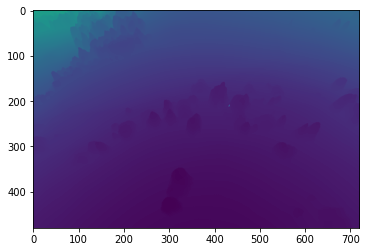

In [17]:
plt.imshow(dist)

In [18]:
for i in range(3):
    print('min: ' + str(init[i].min()))
    print('max: ' + str(init[i].max()))



min: tensor(-472.9217)
max: tensor(-1.)
min: tensor(-1.)
max: tensor(1098.0353)
min: tensor(-1.)
max: tensor(375.3112)


In [9]:
print(init.min())
print(init.max())
print(dist.min())
print(dist.max())

tensor(-475.9217)
tensor(651.1603)
tensor(0.)
tensor(876.1183)


In [10]:
# torch.save(dist, 'dist.dat')

In [62]:
# cam_in_world

array([-43.26358016,  33.21374271, 212.69001557])

In [69]:
# init.size()

torch.Size([3, 480, 720])